In [1]:
# symmetric tree
from catboost import CatBoostRegressor
# Initialize data

train_data = [[1, 4, 5, 6],
              [4, 5, 6, 7],
              [30, 40, 50, 60]]

eval_data = [[2, 4, 6, 8],
             [1, 4, 50, 60]]

train_labels = [10, 20, 30]
# Initialize CatBoostRegressor
# model = CatBoostRegressor(iterations=2,
#                           learning_rate=1,
#                           depth=2)
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2,
                         grow_policy='Depthwise')
# Fit model
model.fit(train_data, train_labels)

0:	learn: 6.1237244	total: 54.1ms	remaining: 54.1ms
1:	learn: 4.5927933	total: 55.2ms	remaining: 0us


In [2]:
pool = None
tree_idx = 0
splits = model._get_tree_splits(tree_idx, pool)
leaf_values = model._get_tree_leaf_values(tree_idx)

In [3]:
splits

['2, bin=28',
 '0, bin=2.5',
 '0, bin=2.5',
 '0, bin=2.5',
 '0, bin=2.5',
 '0, bin=2.5',
 '0, bin=2.5']

In [4]:
import math

In [5]:
index = 0
math.floor(math.log2(1))

0

In [6]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 2,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'Depthwise',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 1,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 2,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 1,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leaves': 4}

In [7]:
import numpy as np
import catboost
from catboost import CatBoostClassifier, Pool

from catboost.datasets import titanic
titanic_df = titanic()

X = titanic_df[0].drop('Survived',axis=1)
y = titanic_df[0].Survived

is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]
pool = Pool(X, y, cat_features=cat_features_index, feature_names=list(X.columns))

model = CatBoostClassifier(
    max_depth=2, verbose=False, max_ctr_complexity=1, iterations=2).fit(pool)

In [8]:
pool, _ = model._process_predict_input_data(pool, "plot_tree", thread_count=-1) if pool is not None else (None, None)

In [9]:
splits = model._get_tree_splits(tree_idx, pool)
leaf_values = model._get_tree_leaf_values(tree_idx)

In [10]:
leaf_values

['val = -0.698\n', 'val = 0.129\n', 'val = -0.410\n', 'val = 0.842\n']

In [11]:
leaf_indices = model.calc_leaf_indexes(X,0,1)

In [12]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NAN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NAN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NAN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NAN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NAN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
len(leaf_indices)

891

In [14]:
pool

In [15]:
model.calc_leaf_indexes(pool)

array([[0, 0],
       [3, 1],
       [1, 1],
       ...,
       [1, 3],
       [2, 0],
       [0, 0]], dtype=uint32)

In [16]:
leaf_indices

array([[0],
       [3],
       [1],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [3],
       [1],
       [3],
       [0],
       [0],
       [1],
       [3],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [3],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [1],
       [3],
       [0],
       [3],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [3],
       [3],
       [2],
       [2],
       [3],
       [0],
       [3],
       [0],
       [0],
       [3],
       [2],
       [0],
       [2],
       [0],
       [3],
       [0],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
    

In [17]:
left_children = np.array([1,3,5,7,9,13])

In [18]:
np.where(left_children == 13)[0][0]

5

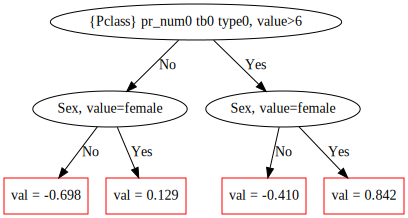

In [19]:
model.plot_tree(0,pool)

In [20]:
model.get_tree_leaf_counts()[]

SyntaxError: invalid syntax (<ipython-input-20-b2bc551f2a24>, line 1)

In [ ]:
help(model.calc_leaf_indexes)

Test out catboost shadow tree

In [1]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [2]:
import pandas as pd

In [3]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [4]:
d = dataset[features + [target]]

In [5]:
from dtreeviz.models.catboost_decision_tree import ShadowCatboostDTree

In [6]:
from catboost import CatBoostClassifier

In [7]:
catboost_model = CatBoostClassifier(iterations=10,learning_rate=1,depth=3)

In [8]:
catboost_model.fit(d[features], d[target])

0:	learn: 0.4647316	total: 54.8ms	remaining: 493ms
1:	learn: 0.4321542	total: 55.9ms	remaining: 224ms
2:	learn: 0.4245113	total: 56.6ms	remaining: 132ms
3:	learn: 0.4202131	total: 57.4ms	remaining: 86.1ms
4:	learn: 0.4144869	total: 58.3ms	remaining: 58.3ms
5:	learn: 0.4063488	total: 59.3ms	remaining: 39.5ms
6:	learn: 0.4013327	total: 60.2ms	remaining: 25.8ms
7:	learn: 0.3999393	total: 61.1ms	remaining: 15.3ms
8:	learn: 0.3991941	total: 62.1ms	remaining: 6.9ms
9:	learn: 0.3977414	total: 63ms	remaining: 0us


In [9]:
catboost_shadow = ShadowCatboostDTree(catboost_model, 0, d[features], d[target], features, target, class_names=[0, 1])

In [10]:
from dtreeviz import trees 

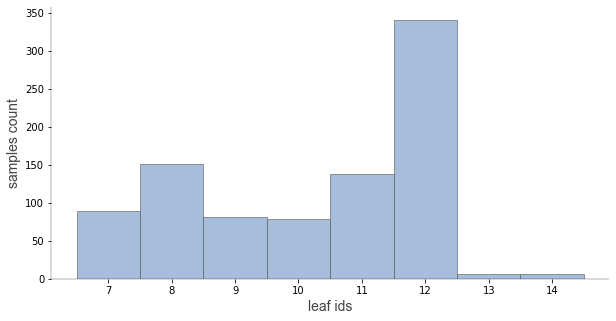

In [11]:
trees.viz_leaf_samples(catboost_shadow)

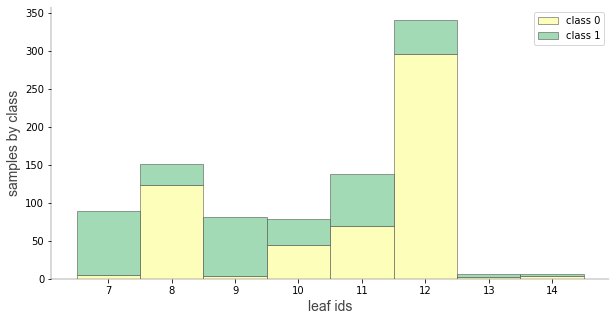

In [12]:
trees.ctreeviz_leaf_samples(catboost_shadow)

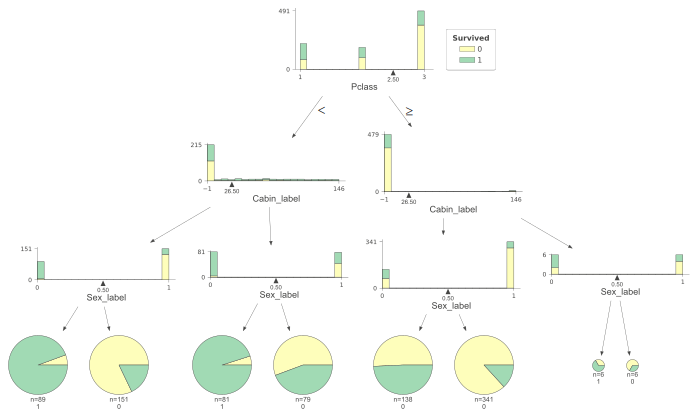

In [13]:
trees.dtreeviz(catboost_shadow)

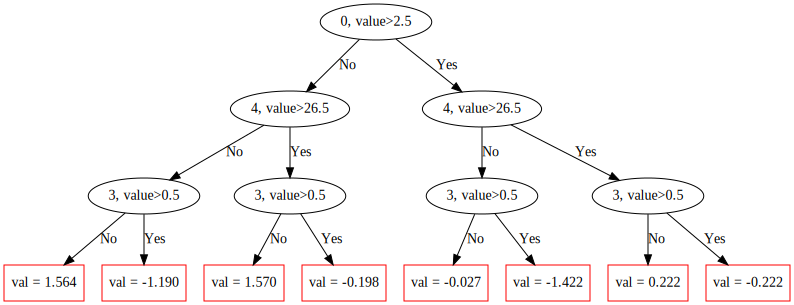

In [14]:
catboost_model.plot_tree(0)

In [15]:
trees.describe_node_sample(catboost_shadow, 1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,1.460000,33.744785,54.948135,0.575000,34.162500,1.46250
std,0.499022,14.271009,66.308753,0.494962,46.171046,0.88914
min,1.000000,0.670000,0.000000,0.000000,-1.000000,-1.00000
25%,1.000000,25.000000,14.875000,0.000000,-1.000000,0.00000
50%,1.000000,31.000000,29.700000,1.000000,-1.000000,2.00000
75%,2.000000,42.000000,73.500000,1.000000,67.250000,2.00000
max,2.000000,80.000000,512.329200,1.000000,146.000000,2.00000


In [16]:
X = dataset[features].iloc[10]

In [17]:
print(trees.explain_prediction_path(catboost_shadow, X, explanation_type="plain_english"))

2.5 <= Pclass 
Sex_label < 0.5
26.5 <= Cabin_label 



# regressor now

In [18]:
features_reg = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg = "Age"

In [19]:
from catboost import CatBoostRegressor

In [20]:
catboost_reg = CatBoostRegressor(iterations=10,learning_rate=1,depth=3)

In [21]:
catboost_reg.fit(d[features_reg], d[target_reg])

0:	learn: 11.8835282	total: 916us	remaining: 8.25ms
1:	learn: 11.6491289	total: 1.69ms	remaining: 6.76ms
2:	learn: 11.5846535	total: 2.49ms	remaining: 5.82ms
3:	learn: 11.5339897	total: 3.28ms	remaining: 4.93ms
4:	learn: 11.4400349	total: 4.08ms	remaining: 4.08ms
5:	learn: 11.4206450	total: 4.68ms	remaining: 3.12ms
6:	learn: 11.4095114	total: 5.32ms	remaining: 2.28ms
7:	learn: 11.3638466	total: 6.08ms	remaining: 1.52ms
8:	learn: 11.3284074	total: 6.78ms	remaining: 753us
9:	learn: 11.2667935	total: 7.76ms	remaining: 0us


In [22]:
catboost_shadow_reg = ShadowCatboostDTree(catboost_reg, 1, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

/Users/billyzhaoyh/Desktop/ef/dtreeviz/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/billyzhaoyh/Desktop/ef/dtreeviz/venv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


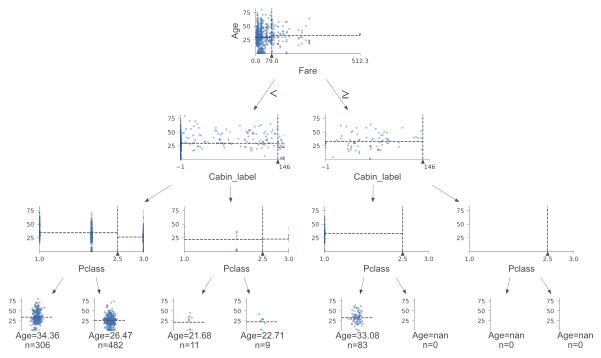

In [23]:
trees.dtreeviz(catboost_shadow_reg)

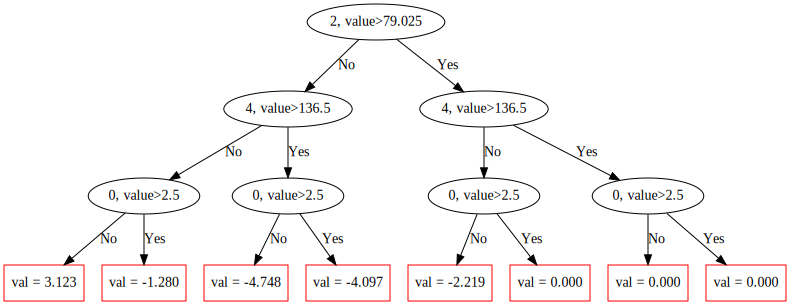

In [31]:
catboost_reg.plot_tree(1)

In [33]:
catboost_shadow_reg.get_node_split(0)

79.025

In [39]:
catboost_shadow_reg.internal[4].split()

2.5

In [67]:
node = catboost_shadow_reg.internal[1]

In [68]:
import numpy as np

In [69]:
samples = np.array(node.samples())

In [70]:
len(samples)

20

In [51]:
node_X_data = catboost_shadow_reg.x_data[samples, node.feature()]

In [52]:
node_X_data

array([3., 2., 3., 3., 2., 2., 2., 3., 3., 1., 2., 2., 3., 2., 2., 3., 3.,
       1., 3., 1.])

In [53]:
split = node.split()

In [59]:
left = np.nonzero(node_X_data < split)[0]

In [61]:
right

NameError: name 'right' is not defined

In [ ]:
prediction_leaves = catboost_shadow_reg.model.calc_leaf_indexes(catboost_shadow_reg.x_data, catboost_shadow_reg.tree_idx, catboost_shadow_reg.tree_idx+1)

In [49]:
node_to_samples = defaultdict(list)

In [50]:
for sample_i, prediction_leaf in enumerate(prediction_leaves):
    assert len(prediction_leaf) == 1
    prediction_leaf_node_id = prediction_leaf[0] + catboost_shadow_reg.non_leaf_node_count
    prediction_path = catboost_shadow_reg._get_leaf_prediction_path(prediction_leaf_node_id)
    for node_id in prediction_path:
        node_to_samples[node_id].append(sample_i)
    if 6 in node_to_samples:
        print(sample_i)
        print(prediction_path)
        print('found')

In [52]:
6 in node_to_samples.keys()

False

In [53]:
node_to_samples[6]

[]

In [34]:
catboost_shadow_reg.get_node_samples()[6]

[]

In [30]:
for key,value in catboost_shadow_reg.get_node_samples().items():
    print(key)
    print(len(value))

8
482
3
788
1
808
0
891
7
306
10
9
4
20
11
83
5
83
2
83
9
11
6
0


3
[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  28  29  30  32  33  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  63  64  65  67  68  69  70  71  72  73  74  76  77  78  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 119 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135 136
 137 138 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 184 185 186 187 188 189 190 191 192 194
 196 197 198 199 200 201 202 203 204 206 207 208 209 210 211 212 213 214
 216 217 218 219 220 221 222 223 225 226 227 228 229 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 246 247 248 249 250 252 253 254 255
 259 260 261 263 264 265 266 267 270 271 272 273 

/Users/billyzhaoyh/Desktop/ef/dtreeviz/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/billyzhaoyh/Desktop/ef/dtreeviz/venv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


6
[]
0


IndexError: arrays used as indices must be of integer (or boolean) type

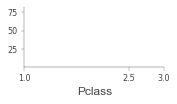

In [24]:
trees.dtreeviz(catboost_shadow_reg)

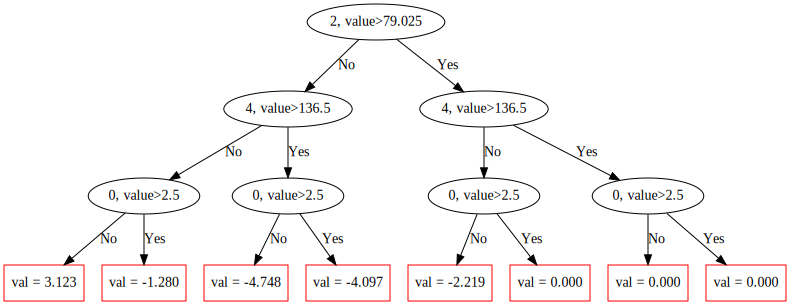

In [25]:
catboost_reg.plot_tree(1)

In [ ]:
trees.viz_leaf_target(xgb_model_reg, dataset[features_reg], dataset[target_reg], feature_names=features_reg, target_name=target_reg, tree_index=1)

In [18]:
catboost_shadow.model._get_tree_leaf_values(0)

['val = 1.564\n',
 'val = -1.190\n',
 'val = 1.570\n',
 'val = -0.198\n',
 'val = -0.027\n',
 'val = -1.422\n',
 'val = 0.222\n',
 'val = -0.222\n']